In [2]:
import numpy as np
import pandas as pd
from qiskit.quantum_info import SparsePauliOp
from susy_qm import calculate_wz_hamiltonian
from wesszumino import build_wz_hamiltonian
import pennylane as qml

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os

In [11]:
# Parameters
N = 4
a = 1.0
c = -0.2
#potential = 'quadratic'
potential = "linear"
#boundary_condition = 'dirichlet'
boundary_condition = 'periodic'

In [12]:
cutoffs = [2]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H_pauli, num_qubits = build_wz_hamiltonian(
        cutoff,
        N,
        a,
        c=c,
        m=1.0,
        potential=potential,
        boundary_condition=boundary_condition,
        remove_zero_terms=True
    )
    H = qml.matrix(H_pauli, wire_order=range(num_qubits))
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_eigenvalue = min(eigenvalues.real)
    min_index = np.argmin(eigenvalues)
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
    states = [format(i, f'0{num_qubits}b') for i in active_indices]
    print("Active basis states:")
    for s in states:
        print(s)

    print('##########################################')


2 4 1.0 linear periodic -0.2
Active basis states:
00001010
00001011
00001110
00001111
00011010
00011011
00011110
00011111
00100010
00100011
00100110
00100111
00101000
00101001
00101100
00101101
00110010
00110011
00110110
00110111
00111000
00111001
00111100
00111101
01001010
01001011
01001110
01001111
01011010
01011011
01011110
01011111
01100010
01100011
01100110
01100111
01101000
01101001
01101100
01101101
01110010
01110011
01110110
01110111
01111000
01111001
01111100
01111101
10000010
10000011
10000110
10000111
10010010
10010011
10010110
10010111
10100000
10100001
10100100
10100101
10110000
10110001
10110100
10110101
11000010
11000011
11000110
11000111
11010010
11010011
11010110
11010111
11100000
11100001
11100100
11100101
11110000
11110001
11110100
11110101
##########################################


2 3 1.0 linear dirichlet -0.8


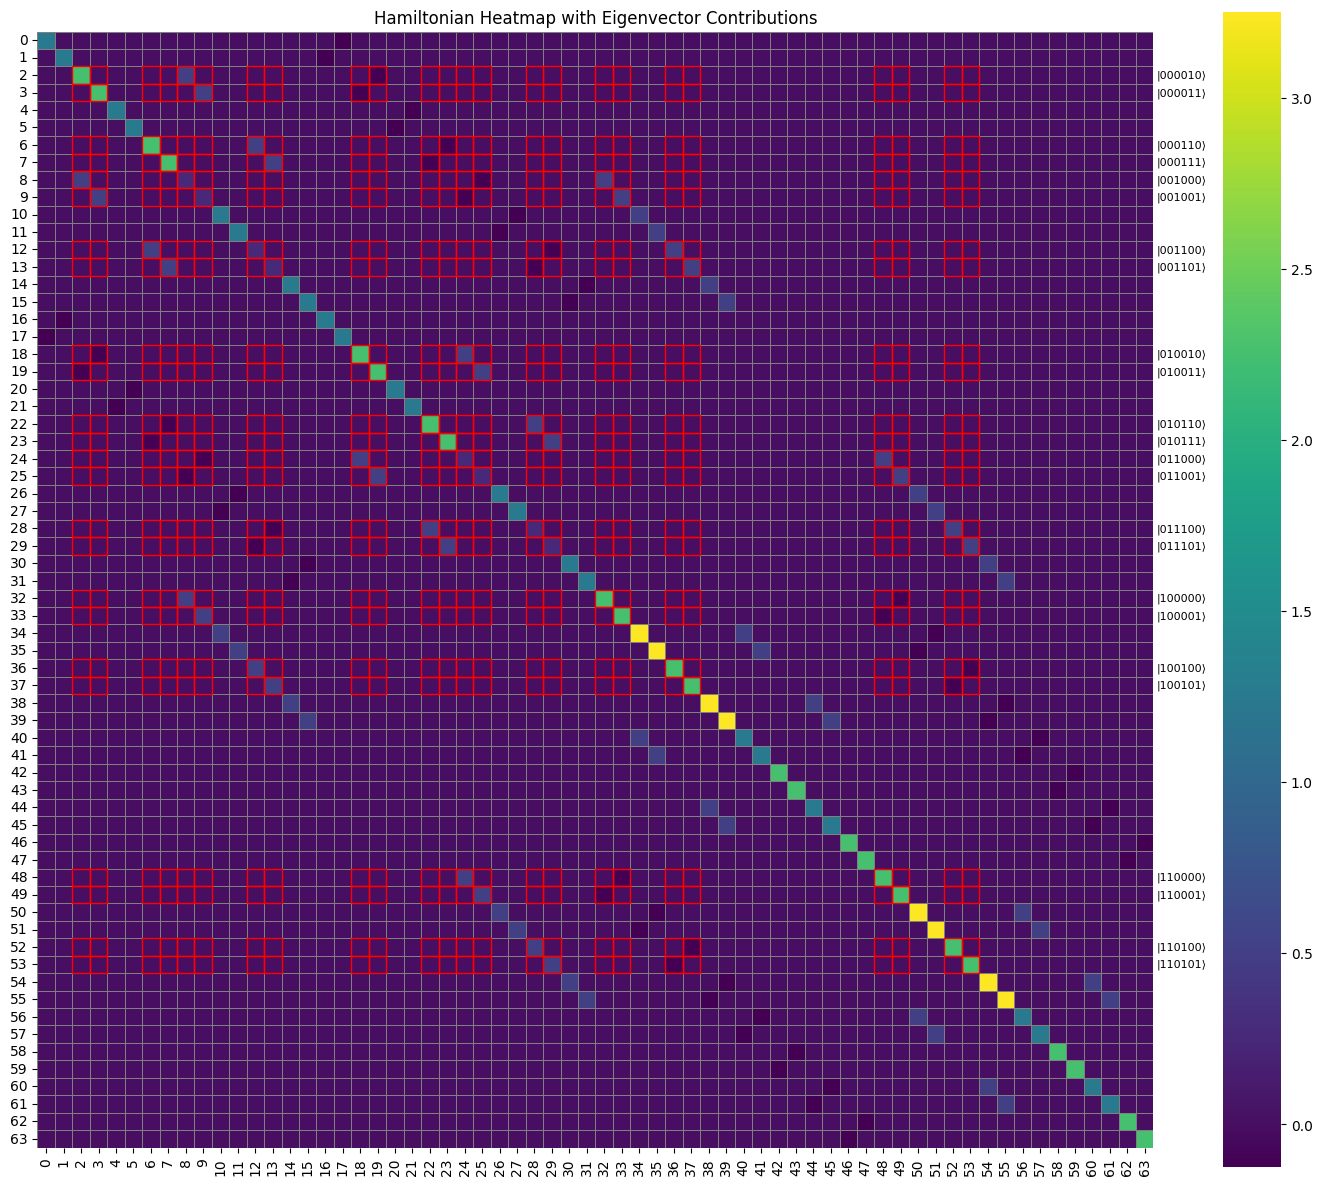

In [6]:
# Parameters
N = 3
a = 1.0
c = -0.8
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

cutoffs = [2]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H_pauli, num_qubits = build_wz_hamiltonian(
        cutoff,
        N,
        a,
        c=c,
        m=1.0,
        potential=potential,
        boundary_condition=boundary_condition,
        remove_zero_terms=True
    )
    H = qml.matrix(H_pauli, wire_order=range(num_qubits))
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_index = np.argmin(eigenvalues)
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    df = pd.DataFrame(H.real)
    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]

    plt.figure(figsize=(18, 15))
    ax = sns.heatmap(df, cmap='viridis', cbar=True, annot=False, linewidths=0.5, linecolor='gray', square=True)

    for i in active_indices:
        for j in active_indices:
            rect = patches.Rectangle(
                (j, i), 1, 1, fill=False, edgecolor='red', linewidth=1
            )
            ax.add_patch(rect)

    eigvec = min_eigenvector.real.flatten()
    #for i in range(len(eigvec)):
    for i in active_indices:
        basis = format(i, f'0{num_qubits}b')
        label = f"|{basis}⟩"#: {eigvec[i].real:.2f}"
        ax.text(df.shape[1] + 0.2, i + 0.5, label, va='center', ha='left', color='black', fontsize=8)

    plt.title("Hamiltonian Heatmap with Eigenvector Contributions")
    plt.show()

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    #save_path = os.path.join(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\Wess-Zumino\EigenvectorChecks\Heatmaps\BasisStates", boundary_condition, potential, folder)
    #os.makedirs(save_path, exist_ok=True)
    #plt.savefig(save_path + f"\\heatmap_{cutoff}")


In [7]:
cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_eigenvalue = min(eigenvalues.real)
    min_index = np.argmin(eigenvalues)
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
    states = [format(i, f'0{num_qubits}b') for i in active_indices]
    print("Active basis states:")
    for s in states:
        print(s)

    print('##########################################')


4 2 1.0 linear dirichlet -0.2
Active basis states:
010000
010010
011000
011010
100000
100010
101000
101010
##########################################


In [7]:
num_qubits

9

In [8]:
min_eigenvalue

np.complex128(0.00011746368064371616+0j)

4 3 1.0 linear dirichlet -0.8


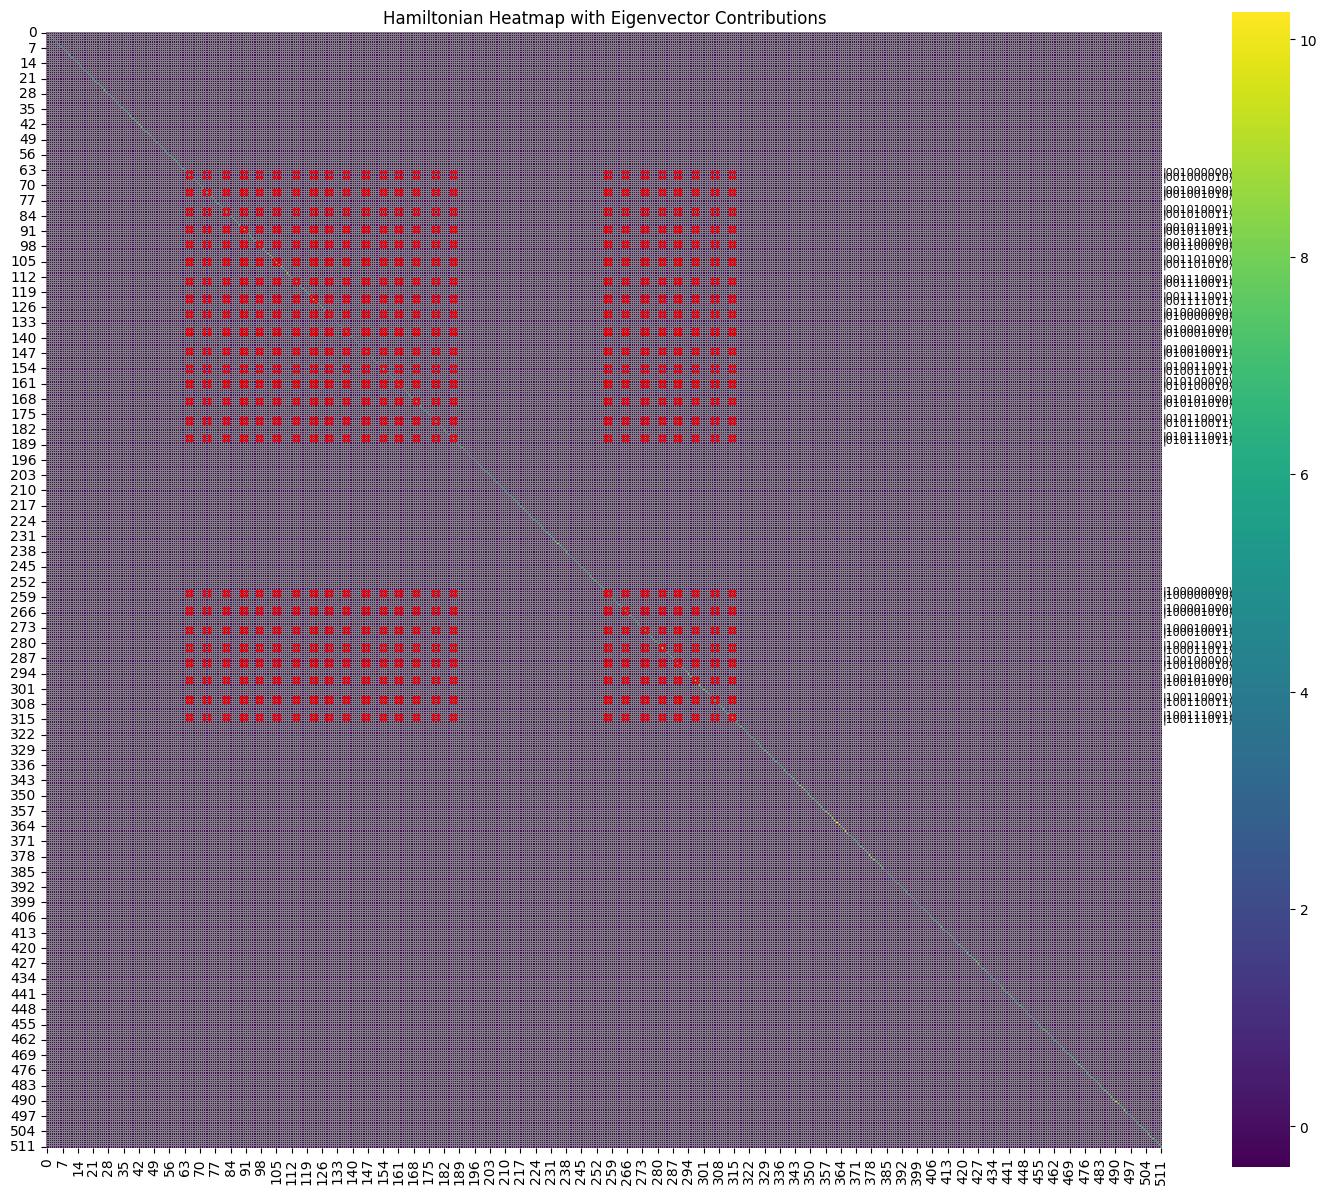

In [9]:
# Parameters
N = 3
a = 1.0
c = -0.8
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_index = np.argmin(eigenvalues)
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    df = pd.DataFrame(H.real)
    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]

    plt.figure(figsize=(18, 15))
    ax = sns.heatmap(df, cmap='viridis', cbar=True, annot=False, linewidths=0.5, linecolor='gray', square=True)

    for i in active_indices:
        for j in active_indices:
            rect = patches.Rectangle(
                (j, i), 1, 1, fill=False, edgecolor='red', linewidth=1
            )
            ax.add_patch(rect)

    eigvec = min_eigenvector.real.flatten()
    #for i in range(len(eigvec)):
    for i in active_indices:
        basis = format(i, f'0{num_qubits}b')
        label = f"|{basis}⟩"#: {eigvec[i].real:.2f}"
        ax.text(df.shape[1] + 0.2, i + 0.5, label, va='center', ha='left', color='black', fontsize=8)

    plt.title("Hamiltonian Heatmap with Eigenvector Contributions")
    #plt.show()

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    save_path = os.path.join(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\Wess-Zumino\EigenvectorChecks\Heatmaps\BasisStates", boundary_condition, potential, folder)
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(save_path + f"\\heatmap_{cutoff}")


In [50]:
def highlight_nonzero(val):
    return 'background-color: green' if val != 0 else ''

df = pd.DataFrame(H.real)
df = df.style.map(highlight_nonzero).format(precision=1)
#df


In [52]:
active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
df = pd.DataFrame(H.real)

def highlight_active_contribution(val, row_idx, col_idx):
    if row_idx in active_indices and col_idx in active_indices:
        return 'background-color: green'
    return ''

styled_df = df.style.apply(
    lambda data: np.vectorize(highlight_active_contribution)(data, *np.indices(data.shape)),
    axis=None
).format("{:.1f}")

styled_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
min_eigenvector.real.flatten()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.97324899,
        0.        ,  0.        ,  0.        , -0.22975292,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])